# PROBLEMATIC LINEAGE SNPS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multicomp as mc
from scipy import stats
import pickle
from scipy.stats import mannwhitneyu as mannwu
from matplotlib.ticker import MultipleLocator
import pysam
from matplotlib.ticker import MaxNLocator

import sys
sys.path.append("./scripts/modules")

from benchmarking_definitions import *
from plotting import *
from regions import *

In [2]:
def x_transform(freq):

    if freq < 1:
        freq = freq*100

    if freq < 10:
        return freq*10
    else:
        return 0.5*freq + 50

In [3]:
x_transformed_points = []
for freq in freqs:
    x_transformed_points.append(x_transform(freq))
x_transformed_points

[10.0, 20.0, 30.0, 40.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0]

In [4]:
L1234_sim_mutation_summary_source = "../../../../lineage123"

In [5]:
tagsL1234 = pd.read_csv("./data/source/FINAL_tag_list_L1234.csv", names=["tag"]).tag.values

len(tagsL1234)

1000

In [6]:
L1234_mutant_summary_source = "/n/scratch/users/s/sm624/benchmarking/variant_summaries/ISS_L1234"

# FN counts for increasing min AF

## L1234

In [7]:
L1234_df = pd.read_csv(f"./data/problematic_lineage_SNPs/ISS_L1234_num_FN_by_AF_by_lineage.csv")
L1234_df.head()

,min_freq,num_FN,lineage,tool
0,0.01,19,L1,FB
1,0.01,19,L1,LF
2,0.01,19,L1,MT
3,0.01,19,L1,PL
4,0.01,19,L1,VD


In [19]:
tool_style_order = ["LF", "MT", "PL", "VD", "VS", "FB"]

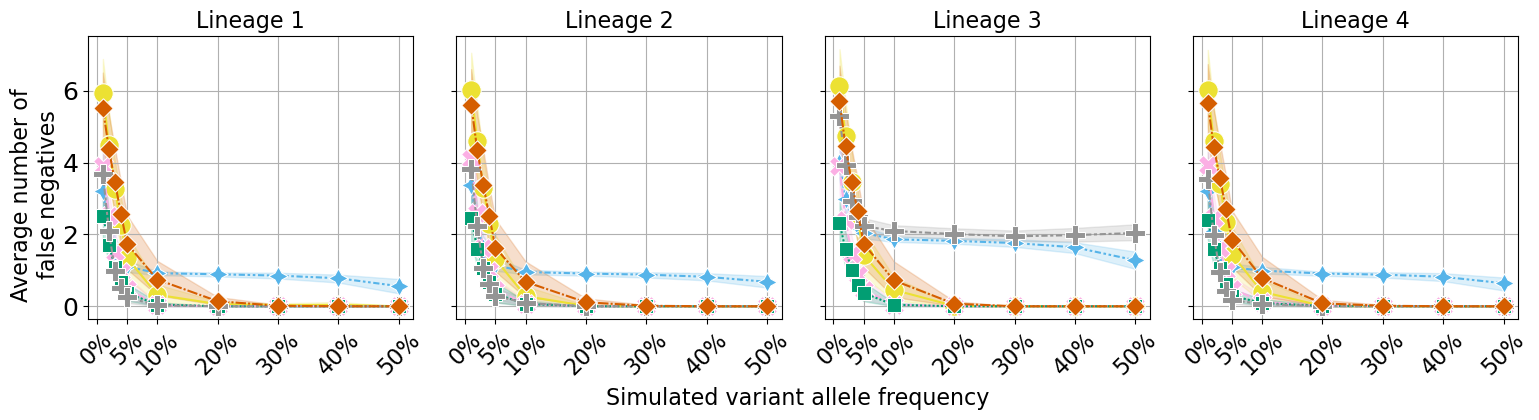

In [20]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 4))

for lineage in range(1, 5):

    lineage_i = lineage - 1

    lineage_name = f"L{lineage}"

    lineage_df = L1234_df[L1234_df.lineage == lineage_name].copy(deep=True)
    lineage_df["min_freq"] = lineage_df["min_freq"].values*100

    ax = axs[lineage_i]

    ax.set_title(f"Lineage {lineage}", fontsize=16)

    ax.grid(True, linewidth=0.8, zorder=0)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    
    sns.lineplot(lineage_df, x="min_freq", y="num_FN", hue="tool", style="tool", style_order=tool_style_order,
                 markers=True, markersize=14, palette=tool_colors, zorder=2, legend=False, ax=ax)

    ax.tick_params(labelsize=18)
    
    x_ticks = [0, 5, 10, 20, 30, 40, 50]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([str(x) for x in x_ticks], fontsize=16, rotation=45, horizontalalignment="center")
            
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f%%'))

    ax.set_ylabel("")
    ax.set_xlabel("")
                                                         
fig.text(0.5, -0.025, "Simulated variant allele frequency", ha='center', fontsize=16)
fig.text(-0.025, 0.5, "Average number of\nfalse negatives", rotation='vertical', va="center", ma="center", fontsize=16) 

plt.tight_layout()
    
file_name = "./figures/problematic_lineage_SNPs/average_FN_per_minAF.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/problematic_lineage_SNPs/average_FN_per_minAF.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

# How many FN occur per lineage for each tool

In [25]:
specific_FN_df = pd.read_csv("./data/problematic_lineage_SNPs/ISS_specific_FN.csv")
specific_FN_df.head(2)

,tag,simulation,genome,depth,freq,pos-ref-alt,tool
0,sim1_L1_mutant_50_0.01,1,L1,50,0.01,7570-C-T,FB
1,sim1_L1_mutant_50_0.01,1,L1,50,0.01,7582-A-C,FB


In [26]:
overall_num_FN_df = pd.read_csv("./data/problematic_lineage_SNPs/ISS_overall_num_FN.csv")
overall_num_FN_df.head()

,tag,simulation,genome,depth,freq,num_FN,tool
0,sim1_L1_mutant_50_0.01,1,L1,50,0.01,20,FB
1,sim1_L1_mutant_50_0.01,1,L1,50,0.01,20,LF
2,sim1_L1_mutant_50_0.01,1,L1,50,0.01,20,MT
3,sim1_L1_mutant_50_0.01,1,L1,50,0.01,20,PL
4,sim1_L1_mutant_50_0.01,1,L1,50,0.01,20,VD


In [27]:
for i, group_df in overall_num_FN_df.groupby("tool"):
    
    print(i)
    
    for lineage in group_df.genome.unique():
        
        lineage_df = group_df[group_df.genome == lineage]
        
        print("Lineage {}: median no. FN per isolate = {}".format(lineage, lineage_df.num_FN.median()))

FB
Lineage L1: median no. FN per isolate = 1.0
Lineage L2: median no. FN per isolate = 1.0
Lineage L3: median no. FN per isolate = 2.0
Lineage L4: median no. FN per isolate = 1.0
Lineage h37rv-1: median no. FN per isolate = 0.0
Lineage h37rv-2: median no. FN per isolate = 0.0
Lineage h37rv-3: median no. FN per isolate = 0.0
Lineage h37rv-4: median no. FN per isolate = 0.0
Lineage h37rv-5: median no. FN per isolate = 0.0
Lineage h37rv-6: median no. FN per isolate = 0.0
Lineage h37rv-7: median no. FN per isolate = 0.0
Lineage h37rv-8: median no. FN per isolate = 0.0
Lineage h37rv-9: median no. FN per isolate = 0.0
Lineage h37rv-10: median no. FN per isolate = 0.0
LF
Lineage L1: median no. FN per isolate = 0.0
Lineage L2: median no. FN per isolate = 0.0
Lineage L3: median no. FN per isolate = 0.0
Lineage L4: median no. FN per isolate = 0.0
Lineage h37rv-1: median no. FN per isolate = 0.0
Lineage h37rv-2: median no. FN per isolate = 0.0
Lineage h37rv-3: median no. FN per isolate = 0.0
Line

In [28]:
rv_tags = ["h37rv-" + str(i) for i in range(1, 11)]

for tool in tools:
    
    print(tool_mapping[tool])
    
    tool_df = specific_FN_df[specific_FN_df.tool == tool]

    for lineage in range(1, 5):

        lineage_label = "L{}".format(lineage)
        
        print("Lineage", lineage)

        lineage_tool_df = tool_df[tool_df.genome == lineage_label]
        
        print(lineage_tool_df["pos-ref-alt"].value_counts())
        
    print("H37Rv")
    
    rv_df = tool_df[tool_df.genome.isin(rv_tags)]
    
    print(rv_df["pos-ref-alt"].value_counts())

FreeBayes
Lineage 1
pos-ref-alt
7582-A-C       237
761137-C-T      36
761139-C-G      36
4407796-G-A     36
2288920-C-A     35
2289103-T-G     34
2289105-G-T     34
2288962-A-C     33
2288887-A-C     32
4327267-C-A     31
2288839-T-C     31
2288973-A-C     30
2288817-G-T     30
4247469-A-G     29
2289050-A-G     29
2289097-C-A     29
1473246-A-G     28
7570-C-T        26
2288778-A-G     26
2289072-T-G     25
Name: count, dtype: int64
Lineage 2
pos-ref-alt
7582-A-C       237
761139-C-G      42
2289105-G-T     41
2289103-T-G     40
761137-C-T      39
2288778-A-G     39
2289097-C-A     35
2289050-A-G     34
4407796-G-A     33
2289072-T-G     32
2288817-G-T     32
2288920-C-A     32
1473246-A-G     31
2288887-A-C     31
2288839-T-C     31
2288962-A-C     31
4247469-A-G     31
2288973-A-C     30
4327267-C-A     29
7570-C-T        24
Name: count, dtype: int64
Lineage 3
pos-ref-alt
2289050-A-G    246
7582-A-C       236
2289103-T-G     41
2289105-G-T     41
2289097-C-A     33
2289072-T-G     3

In [30]:
problem_positions = [7582, 2289050, 2289072]

In [31]:
for pos in problem_positions:
    print(pos, pos in LM_pos)

7582 False
2289050 False
2289072 False


In [39]:
# lowest 7582 for FB
(236/250)*100

94.39999999999999

In [44]:
# 2289050 for FB and VD
(246/250)*100

98.4

In [43]:
# 2289072 for VD
(190/250)*100

76.0

# Determine distance between every introduced DR mutation and the nearest lineage/baseline variant

The `L123_mutant.csv` file lists the mutated positions relative to H37Rv. The baseline variant files for each lineage's representative isolate also lists the baseline positions relative to H37Rv.

In [8]:
def find_sandwich(df, pos):
    
    i = 0
    while i < df.shape[0]-1:
        
        pos_1, pos_2 = df.loc[i, "POS"], df.loc[i+1, "POS"]
        
        if pos_1 <= pos and pos <= pos_2:
            return(pos_1, pos_2)
        
        i += 1
        
    return (df.loc[df.shape[0]-1, "POS"], np.nan)

In [16]:
baseline_variants_source = "{}/baseline_variants".format(L1234_sim_mutation_summary_source)

In [7]:
L1234_mutant_summary_df = pd.read_csv("{}/mutant_summaries_final/L123_mutant.csv".format(L1234_sim_mutation_summary_source))
L1234_mutant_summary_df.head()

,POS,REF,ALT,TYPE
0,2288778,A,G,DR
1,2289072,T,G,DR
2,2289050,A,G,DR
3,2288962,A,C,DR
4,2289097,C,A,DR


In [10]:
for lineage in range(1, 5):
    
    lineage_snp_distance_df = pd.DataFrame(columns=["POS", "REF", "ALT", "LEFT_VAR_DIST", "LEFT_VAR", "RIGHT_VAR_DIST", "RIGHT_VAR"])
    df_i = 0
    
    baseline_variants = pd.read_csv("{0}/L{1}_baseline.csv".format(baseline_variants_source, lineage))
    
    for i in L1234_mutant_summary_df.index:
        POS, REF, ALT = L1234_mutant_summary_df.loc[i, "POS"], L1234_mutant_summary_df.loc[i, "REF"], L1234_mutant_summary_df.loc[i, "ALT"]
        (left_var, right_var) = find_sandwich(baseline_variants, POS)
        left_var_dist = POS - left_var
        try:
            right_var_dist = right_var - POS
        except ValueError:
            right_var_dist = np.nan
        lineage_snp_distance_df.loc[df_i] = [POS, REF, ALT, left_var_dist, left_var, right_var_dist, right_var]
        df_i += 1
    
    lineage_snp_distance_df.to_csv("./data/problematic_lineage_SNPs/L{}_baseline_variant_snp_distance.csv".format(lineage), index=False)

# Determine distance between every introduced DR mutation and the nearest other introduced DR mutation

In [11]:
def determine_closest(df, pos):
    
    ix = df[df.POS == pos].index.values[0]
    
    if ix == 0:
        
        pos_1 = np.nan
        pos_2 = df.loc[1, "POS"]
        
    elif ix == df.shape[0]-1:
        
        pos_1 = df.loc[df.shape[0]-2, "POS"]
        pos_2 = np.nan
        
    else:
        
        pos_1 = df.loc[ix-1, "POS"]
        pos_2 = df.loc[ix+1, "POS"]
    
    return(pos_1, pos_2)


In [14]:
L1234_mutant_summary_df = pd.read_csv("{}/mutant_summaries_final/L123_mutant.csv".format(L1234_sim_mutation_summary_source))
L1234_mutant_summary_df.sort_values("POS", inplace=True)
L1234_mutant_summary_df.reset_index(inplace=True, drop=True)
L1234_mutant_summary_df

,POS,REF,ALT,TYPE
0,7570,C,T,DR
1,7582,A,C,DR
2,761137,C,T,DR
3,761139,C,G,DR
4,1473246,A,G,DR
5,2288778,A,G,DR
6,2288817,G,T,DR
7,2288839,T,C,DR
8,2288887,A,C,DR
9,2288920,C,A,DR


In [15]:
lineage_mut_distance_df = pd.DataFrame(columns=["POS", "REF", "ALT", "LEFT_MUT_DIST", "LEFT_MUT", "RIGHT_MUT_DIST", "RIGHT_MUT"])
df_i = 0

for i in L1234_mutant_summary_df.index:
    POS, REF, ALT = L1234_mutant_summary_df.loc[i, "POS"], L1234_mutant_summary_df.loc[i, "REF"], L1234_mutant_summary_df.loc[i, "ALT"]
    (left_mut, right_mut) = determine_closest(L1234_mutant_summary_df, POS)
    left_mut_dist = POS - left_mut
    try:
        right_mut_dist = right_mut - POS
    except ValueError:
        right_mut_dist = np.nan
    lineage_mut_distance_df.loc[df_i] = [POS, REF, ALT, left_mut_dist, left_mut, right_mut_dist, right_mut]
    df_i += 1
    
lineage_mut_distance_df.to_csv("./data/problematic_lineage_SNPs/L1234_introduced_mutation_distance.csv", index=False)

# Look at distance to baseline/lineage variants for problematic SNPs consistently missed in specific lineages by FreeBayes and VarDict

## Lineages 1-4

POS = 7582

In [17]:
lineage_mut_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L1234_introduced_mutation_distance.csv").set_index("POS")
display(lineage_mut_distance_df.loc[7582].to_frame())

for lineage in range(1, 5):
    
    lineage_snp_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L{}_baseline_variant_snp_distance.csv".format(lineage)).set_index("POS")
    
    print("L{}".format(lineage))
    
    display(lineage_snp_distance_df.loc[7582].to_frame())

,7582
REF,A
ALT,C
LEFT_MUT_DIST,12.0
LEFT_MUT,7570.0
RIGHT_MUT_DIST,753555.0
RIGHT_MUT,761137.0


L1


,7582
REF,A
ALT,C
LEFT_VAR_DIST,220
LEFT_VAR,7362
RIGHT_VAR_DIST,3
RIGHT_VAR,7585


L2


,7582
REF,A
ALT,C
LEFT_VAR_DIST,220
LEFT_VAR,7362
RIGHT_VAR_DIST,3
RIGHT_VAR,7585


L3


,7582
REF,A
ALT,C
LEFT_VAR_DIST,220
LEFT_VAR,7362
RIGHT_VAR_DIST,3
RIGHT_VAR,7585


L4


,7582
REF,A
ALT,C
LEFT_VAR_DIST,220
LEFT_VAR,7362
RIGHT_VAR_DIST,3
RIGHT_VAR,7585


## Lineage 3

POS = 2289050<br>
POS = 2289072

In [18]:
lineage_mut_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L1234_introduced_mutation_distance.csv").set_index("POS")
lineage_snp_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L{}_baseline_variant_snp_distance.csv".format(3)).set_index("POS")

print("POS =", 2289050)

display(lineage_mut_distance_df.loc[2289050].to_frame())

display(lineage_snp_distance_df.loc[2289050].to_frame())

print("POS =", 2289072)

display(lineage_mut_distance_df.loc[2289072].to_frame())

display(lineage_snp_distance_df.loc[2289072].to_frame())

POS = 2289050


,2289050
REF,A
ALT,G
LEFT_MUT_DIST,77.0
LEFT_MUT,2288973.0
RIGHT_MUT_DIST,22.0
RIGHT_MUT,2289072.0


,2289050
REF,A
ALT,G
LEFT_VAR_DIST,3
LEFT_VAR,2289047
RIGHT_VAR_DIST,315
RIGHT_VAR,2289365


POS = 2289072


,2289072
REF,T
ALT,G
LEFT_MUT_DIST,22.0
LEFT_MUT,2289050.0
RIGHT_MUT_DIST,25.0
RIGHT_MUT,2289097.0


,2289072
REF,T
ALT,G
LEFT_VAR_DIST,25
LEFT_VAR,2289047
RIGHT_VAR_DIST,293
RIGHT_VAR,2289365


## Plot

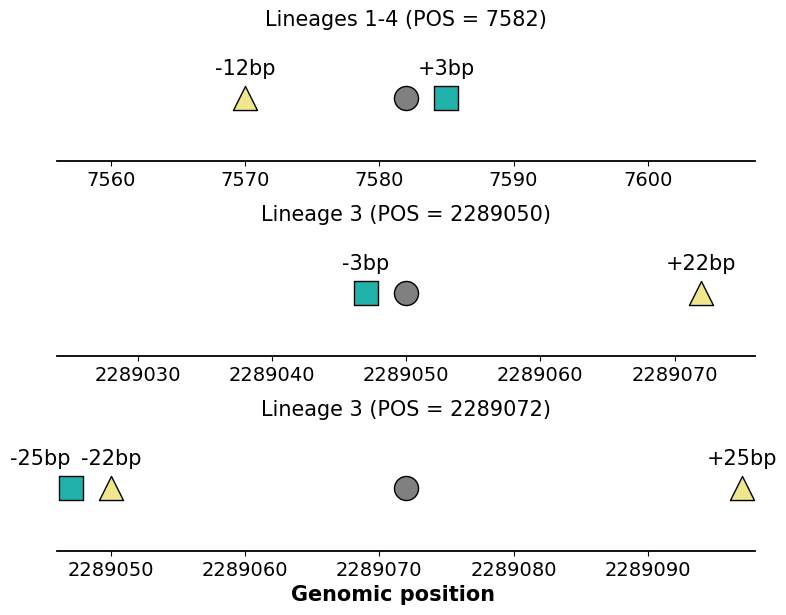

In [25]:
mutation_color = "#F0E68C"
baseline_color = "#20B2AA"

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))

lineage_mut_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L1234_introduced_mutation_distance.csv").set_index("POS")

# Lineages 1-4
lineage_snp_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L1_baseline_variant_snp_distance.csv").set_index("POS")

POS = 7582
x_lower, x_upper = POS - 26, POS + 26
ax1.set_xlim(x_lower, x_upper)

ax1.set_title("Lineages 1-4 (POS = {})".format(POS), fontsize=15)

ax1.scatter(x=[POS], y=[1], s=300, color="grey", edgecolor="black")

baseline_right = lineage_snp_distance_df.loc[POS].to_frame().loc["RIGHT_VAR", POS]
baseline_right_dist = lineage_snp_distance_df.loc[POS].to_frame().loc["RIGHT_VAR_DIST", POS]
ax1.scatter(x=[baseline_right], y=[1], s=300, marker="s", color=baseline_color, edgecolor="black")
ax1.text(baseline_right, 1.02, "+{}bp".format(baseline_right_dist), ha='center', fontsize=15)

mutation_left = lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT", POS]
mutation_left_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT_DIST", POS])
ax1.scatter(x=[mutation_left], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black")
ax1.text(mutation_left, 1.02, "-{}bp".format(mutation_left_dist), ha='center', fontsize=15)

# Lineage 3
lineage_snp_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L3_baseline_variant_snp_distance.csv").set_index("POS")

## POS = 2289050
POS = 2289050
x_lower, x_upper = POS - 26, POS + 26
ax2.set_xlim(x_lower, x_upper)

ax2.set_title("Lineage 3 (POS = {})".format(POS), fontsize=15)

ax2.scatter(x=[POS], y=[1], s=300, color="grey", edgecolor="black", label="Problematic simulated mutation")

baseline_left = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR", POS]
baseline_left_dist = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR_DIST", POS]
ax2.scatter(x=[baseline_left], y=[1], s=300, marker="s", color=baseline_color, edgecolor="black", label="Baseline variant")
ax2.text(baseline_left, 1.02, "-{}bp".format(baseline_left_dist), ha='center', fontsize=15)

mutation_right = lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT", POS]
mutation_right_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT_DIST", POS])
ax2.scatter(x=[mutation_right], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black", label="Simulated mutation")
ax2.text(mutation_right, 1.02, "+{}bp".format(mutation_right_dist), ha='center', fontsize=15)

## POS = 2289072
POS = 2289072
x_lower, x_upper = POS - 26, POS + 26
ax3.set_xlim(x_lower, x_upper)

ax3.set_title("Lineage 3 (POS = {})".format(POS), fontsize=15)

ax3.scatter(x=[POS], y=[1], s=300, color="grey", edgecolor="black")

mutation_left = lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT", POS]
mutation_left_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT_DIST", POS])
ax3.scatter(x=[mutation_left], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black")
ax3.text(mutation_left, 1.02, "-{}bp".format(mutation_left_dist), ha='center', fontsize=15)

mutation_right = lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT", POS]
mutation_right_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT_DIST", POS])
ax3.scatter(x=[mutation_right], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black")
ax3.text(mutation_right, 1.02, "+{}bp".format(mutation_right_dist), ha='center', fontsize=15)

baseline_left = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR", POS]
baseline_left_dist = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR_DIST", POS]
ax3.scatter(x=[baseline_left], y=[1], s=300, marker="s", color=baseline_color, edgecolor="black")
ax3.text(baseline_left, 1.02, "-{}bp".format(baseline_left_dist), ha='right', fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.tick_params(labelsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.spines['bottom'].set_linewidth(1.3)
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

fig.text(0.5, -0.01, 'Genomic position', ha='center', fontsize=15, fontweight="bold")

plt.tight_layout()

#ax2.legend(labelspacing=1, fontsize=14)

file_name = "./figures/problematic_lineage_SNPs/distance_plot_within50bp.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/problematic_lineage_SNPs/distance_plot_within50bp.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)


plt.show()

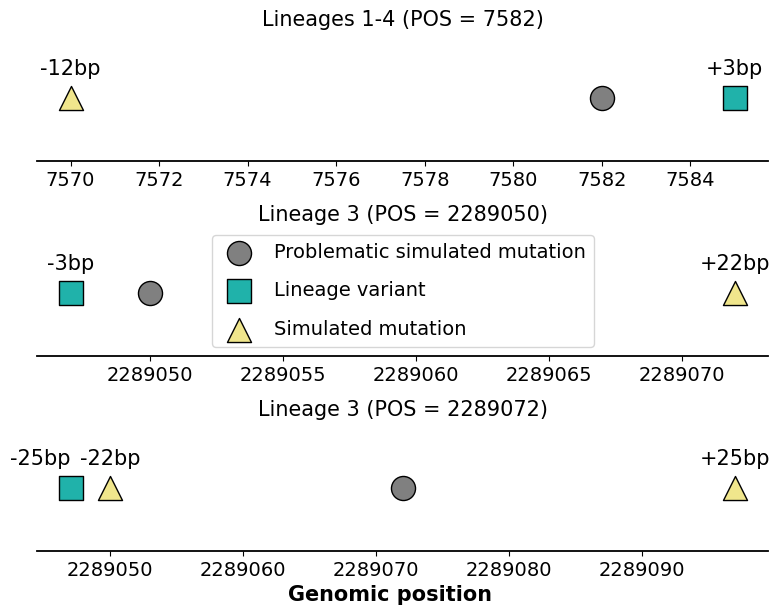

In [26]:
## legend

mutation_color = "#F0E68C"
baseline_color = "#20B2AA"

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))

lineage_mut_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L1234_introduced_mutation_distance.csv").set_index("POS")

# Lineages 1-4
lineage_snp_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L1_baseline_variant_snp_distance.csv").set_index("POS")

POS = 7582

ax1.set_title("Lineages 1-4 (POS = {})".format(POS), fontsize=15)

ax1.scatter(x=[POS], y=[1], s=300, color="grey", edgecolor="black")

baseline_right = lineage_snp_distance_df.loc[POS].to_frame().loc["RIGHT_VAR", POS]
baseline_right_dist = lineage_snp_distance_df.loc[POS].to_frame().loc["RIGHT_VAR_DIST", POS]
ax1.scatter(x=[baseline_right], y=[1], s=300, marker="s", color=baseline_color, edgecolor="black")
ax1.text(baseline_right, 1.02, "+{}bp".format(baseline_right_dist), ha='center', fontsize=15)

mutation_left = lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT", POS]
mutation_left_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT_DIST", POS])
ax1.scatter(x=[mutation_left], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black")
ax1.text(mutation_left, 1.02, "-{}bp".format(mutation_left_dist), ha='center', fontsize=15)

# Lineage 3
lineage_snp_distance_df = pd.read_csv("./data/problematic_lineage_SNPs/L3_baseline_variant_snp_distance.csv").set_index("POS")

## POS = 2289050
POS = 2289050

ax2.set_title("Lineage 3 (POS = {})".format(POS), fontsize=15)

ax2.scatter(x=[POS], y=[1], s=300, color="grey", edgecolor="black", label="Problematic simulated mutation")

baseline_left = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR", POS]
baseline_left_dist = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR_DIST", POS]
ax2.scatter(x=[baseline_left], y=[1], s=300, marker="s", color=baseline_color, edgecolor="black", label="Lineage variant")
ax2.text(baseline_left, 1.02, "-{}bp".format(baseline_left_dist), ha='center', fontsize=15)

mutation_right = lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT", POS]
mutation_right_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT_DIST", POS])
ax2.scatter(x=[mutation_right], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black", label="Simulated mutation")
ax2.text(mutation_right, 1.02, "+{}bp".format(mutation_right_dist), ha='center', fontsize=15)

## POS = 2289072
POS = 2289072

ax3.set_title("Lineage 3 (POS = {})".format(POS), fontsize=15)

ax3.scatter(x=[POS], y=[1], s=300, color="grey", edgecolor="black")

mutation_left = lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT", POS]
mutation_left_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["LEFT_MUT_DIST", POS])
ax3.scatter(x=[mutation_left], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black")
ax3.text(mutation_left, 1.02, "-{}bp".format(mutation_left_dist), ha='center', fontsize=15)

mutation_right = lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT", POS]
mutation_right_dist = int(lineage_mut_distance_df.loc[POS].to_frame().loc["RIGHT_MUT_DIST", POS])
ax3.scatter(x=[mutation_right], y=[1], s=300, marker="^", color=mutation_color, edgecolor="black")
ax3.text(mutation_right, 1.02, "+{}bp".format(mutation_right_dist), ha='center', fontsize=15)

baseline_left = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR", POS]
baseline_left_dist = lineage_snp_distance_df.loc[POS].to_frame().loc["LEFT_VAR_DIST", POS]
ax3.scatter(x=[baseline_left], y=[1], s=300, marker="s", color=baseline_color, edgecolor="black")
ax3.text(baseline_left, 1.02, "-{}bp".format(baseline_left_dist), ha='right', fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.tick_params(labelsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.spines['bottom'].set_linewidth(1.3)
    ax.set_yticks([])
    ax.set_yticklabels([])
    
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

fig.text(0.5, -0.01, 'Genomic position', ha='center', fontsize=15, fontweight="bold")

plt.tight_layout()

ax2.legend(labelspacing=1, fontsize=14)

file_name = "./figures/problematic_lineage_SNPs/distance_plot_legend.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/problematic_lineage_SNPs/distance_plot_legend.jpeg"
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)


plt.show()

# Examine read characteristics for these coocurring SNPs

In [6]:
wgs_source = "/n/data1/hms/dbmi/farhat/shandu/projects/mixed_calls/benchmarking/comprehensive/ISSL123_wgs_processing/output{}x"

pos7582_plus3_supporting_reads_df = pd.DataFrame(columns=["tag", "simulation", "lineage", "depth", "freq", "num_reads_supporting", "num_reads_not_supporting", "FB_found"])
df_i = 0

count = 0
for tag in tagsL1234:
    
    if count % 100 == 0:
        print(count, end=" ")
    count += 1
    
    depth = int(tag.split("_")[3])
    freq = float(tag.split("_")[4])
    lineage = int(tag.split("_")[1].strip("L"))
    sim = int(tag.split("_")[0].strip("sim"))
    
    depth_wgs_source = wgs_source.format(depth)
    
    mutant_summary_df = pd.read_csv("{0}/output/{1}.final.csv".format(L1234_mutant_summary_source, tag)).set_index(["POS", "REF", "ALT"])
    
    bam = pysam.AlignmentFile("{0}/{1}/bam/{1}.sorted.duprem.bam".format(depth_wgs_source, tag))
    reads = bam.fetch("NC_000962.3", 7582, 7585)

    count_support, count_no_support = 0, 0
    for read in reads:
        if not read.is_unmapped:
            positions = read.get_reference_positions()
            if 7582 in positions and 7585 in positions:
                count_support += 1
            else:
                count_no_support += 1

    pos7582_plus3_supporting_reads_df.loc[df_i] = [tag, sim, lineage, depth, freq, count_support, count_no_support, int(mutant_summary_df.loc[(7582, "A", "C"), "FB_found"])]
    df_i += 1

0 100 200 300 400 500 600 700 800 900 

In [7]:
pos7582_plus3_supporting_reads_df.to_csv("./data/problematic_lineage_SNPs/pos7582_plus3_supporting_reads.csv", index=False)

In [8]:
pos7582_plus3_supporting_reads_df

,tag,simulation,lineage,depth,freq,num_reads_supporting,num_reads_not_supporting,FB_found
0,sim1_L1_mutant_50_0.01,1,1,50,0.01,57,2,0
1,sim1_L2_mutant_50_0.01,1,2,50,0.01,56,3,1
2,sim1_L3_mutant_50_0.01,1,3,50,0.01,66,2,0
3,sim2_L1_mutant_50_0.01,2,1,50,0.01,54,4,0
4,sim2_L2_mutant_50_0.01,2,2,50,0.01,54,3,0
...,...,...,...,...,...,...,...,...
995,sim1_L4_mutant_700_0.5,1,4,700,0.50,803,22,0
996,sim2_L4_mutant_700_0.5,2,4,700,0.50,770,30,0
997,sim3_L4_mutant_700_0.5,3,4,700,0.50,799,34,0
998,sim4_L4_mutant_700_0.5,4,4,700,0.50,818,35,0


(array([  2.,   6.,  10.,  33.,  71., 250., 352., 172.,  71.,  33.]),
 array([0.89655172, 0.90689655, 0.91724138, 0.92758621, 0.93793103,
        0.94827586, 0.95862069, 0.96896552, 0.97931034, 0.98965517,
        1.        ]),
 <BarContainer object of 10 artists>)

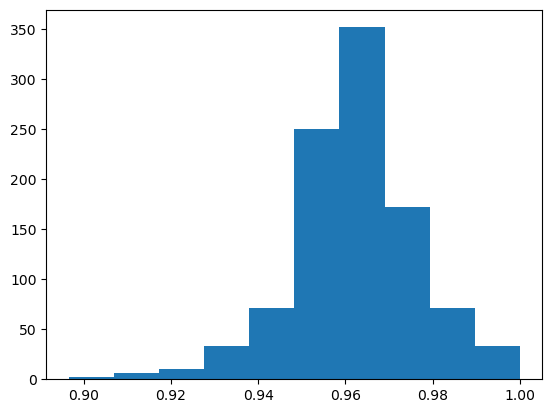

In [9]:
supp = np.array(pos7582_plus3_supporting_reads_df.num_reads_supporting)
no_supp = np.array(pos7582_plus3_supporting_reads_df.num_reads_not_supporting)

plt.hist([supp/(supp+no_supp)])

# Describe distance of each introduced mutation to other introduced mutations and baseline diversity

In [17]:
baseline_variants_source = "{}/baseline_variants".format(L1234_sim_mutation_summary_source)

In [11]:
L1234_mutant_summary_df = pd.read_csv("{}/mutant_summaries_final/L123_mutant.csv".format(L1234_sim_mutation_summary_source))
L1234_mutant_summary_df.sort_values("POS", inplace=True)
L1234_mutant_summary_df.reset_index(drop=True, inplace=True)
L1234_mutant_summary_df.head()

,POS,REF,ALT,TYPE
0,7570,C,T,DR
1,7582,A,C,DR
2,761137,C,T,DR
3,761139,C,G,DR
4,1473246,A,G,DR


## Distance to other introduced mutations

In [12]:
simulated_mutation_window_diversity_df = pd.DataFrame(columns=["POS", "REF", "ALT", "num_mutation_20bp", "num_mutation_50bp", "num_mutation_100bp", "num_mutation_200bp"])
df_i = 0

for i in L1234_mutant_summary_df.index:
    
    POS, REF, ALT = L1234_mutant_summary_df.loc[i, "POS"], L1234_mutant_summary_df.loc[i, "REF"], L1234_mutant_summary_df.loc[i, "ALT"]
    
    left_window_20bp, right_window_20bp = POS - 10, POS + 10
    left_window_50bp, right_window_50bp = POS - 25, POS + 25
    left_window_100bp, right_window_100bp = POS - 50, POS + 50
    left_window_200bp, right_window_200bp = POS - 100, POS + 100
    
    mutation_count_20bp, mutation_count_50bp, mutation_count_100bp, mutation_count_200bp = 0, 0, 0, 0
    
    for j in L1234_mutant_summary_df.index:
        
        pos = L1234_mutant_summary_df.loc[j, "POS"]
        
        if left_window_200bp <= pos and pos <= right_window_200bp:
            
            mutation_count_200bp += 1
            
            if left_window_100bp <= pos and pos <= right_window_100bp:
                
                mutation_count_100bp += 1
                
                if left_window_50bp <= pos and pos <= right_window_50bp:
                
                    mutation_count_50bp += 1
                    
                    if left_window_20bp <= pos and pos <= right_window_20bp:
                
                        mutation_count_20bp += 1
        
    simulated_mutation_window_diversity_df.loc[df_i] = [POS, REF, ALT, mutation_count_20bp, mutation_count_50bp, mutation_count_100bp, mutation_count_200bp]
    df_i += 1
    
simulated_mutation_window_diversity_df

,POS,REF,ALT,num_mutation_20bp,num_mutation_50bp,num_mutation_100bp,num_mutation_200bp
0,7570,C,T,1,2,2,2
1,7582,A,C,1,2,2,2
2,761137,C,T,2,2,2,2
3,761139,C,G,2,2,2,2
4,1473246,A,G,1,1,1,1
5,2288778,A,G,1,1,2,3
6,2288817,G,T,1,2,3,4
7,2288839,T,C,1,2,3,5
8,2288887,A,C,1,1,3,6
9,2288920,C,A,1,1,3,5


In [13]:
simulated_mutation_window_diversity_df.to_csv("./data/problematic_lineage_SNPs/L1234_simulated_mutation_window_diversity.csv", index=False)

## Distance to baseline variants for each lineage

In [18]:
for lineage in range(1, 5):
    
    lineage_baseline_variant_window_diversity_df = pd.DataFrame(columns=["POS", "REF", "ALT", "num_baseline_20bp", "num_baseline_50bp", "num_baseline_100bp", "num_baseline_200bp"])
    df_i = 0
    
    baseline_variants = pd.read_csv("{0}/L{1}_baseline.csv".format(baseline_variants_source, lineage))
    
    for i in L1234_mutant_summary_df.index:
        
        POS, REF, ALT = L1234_mutant_summary_df.loc[i, "POS"], L1234_mutant_summary_df.loc[i, "REF"], L1234_mutant_summary_df.loc[i, "ALT"]
        
        left_window_20bp, right_window_20bp = POS - 10, POS + 10
        left_window_50bp, right_window_50bp = POS - 25, POS + 25
        left_window_100bp, right_window_100bp = POS - 50, POS + 50
        left_window_200bp, right_window_200bp = POS - 100, POS + 100
        
        mutation_count_20bp, mutation_count_50bp, mutation_count_100bp, mutation_count_200bp = 0, 0, 0, 0
        
        for j in baseline_variants.index:
        
            pos = baseline_variants.loc[j, "POS"]

            if left_window_200bp <= pos and pos <= right_window_200bp:

                mutation_count_200bp += 1

                if left_window_100bp <= pos and pos <= right_window_100bp:

                    mutation_count_100bp += 1
                    
                    if left_window_50bp <= pos and pos <= right_window_50bp:

                        mutation_count_50bp += 1
                        
                        if left_window_20bp <= pos and pos <= right_window_20bp:

                            mutation_count_20bp += 1

        lineage_baseline_variant_window_diversity_df.loc[df_i] = [POS, REF, ALT, mutation_count_20bp, mutation_count_50bp, mutation_count_100bp, mutation_count_200bp]
        df_i += 1
            
    lineage_baseline_variant_window_diversity_df.to_csv("./data/problematic_lineage_SNPs/L{}_lineage_baseline_variant_window_diversity.csv".format(lineage), index=False)

## Plot

In [33]:
lineages = range(1, 5)

In [34]:
lineage_baseline_variant_window_diversity_dfs = {}

for lineage in lineages:
    
    lineage_df = pd.read_csv("./data/problematic_lineage_SNPs/L{}_lineage_baseline_variant_window_diversity.csv".format(lineage)).set_index("POS")
    lineage_baseline_variant_window_diversity_dfs[lineage] = lineage_df

In [36]:
simulated_mutation_window_diversity_df = pd.read_csv("./data/problematic_lineage_SNPs/L1234_simulated_mutation_window_diversity.csv").set_index("POS")

In [37]:
L1234_mutant_summary_df = pd.read_csv("{}/mutant_summaries_final/L123_mutant.csv".format(L1234_sim_mutation_summary_source))
L1234_mutant_summary_df.sort_values("POS", inplace=True)
L1234_mutant_summary_df.reset_index(drop=True, inplace=True)
L1234_mutant_summary_df.head()

,POS,REF,ALT,TYPE
0,7570,C,T,DR
1,7582,A,C,DR
2,761137,C,T,DR
3,761139,C,G,DR
4,1473246,A,G,DR


In [38]:
window_sizes = [20, 50, 100, 200]

window_size_dfs = {}

for ws in window_sizes:
    
    dfs = {l:pd.DataFrame(columns=["POS", "num_baseline_{}bp".format(ws), "num_mutation_{}bp".format(ws), "problematic"]) for l in range(1, 5)}
    
    for lineage in range(1, 5):
        
        df_i = 0
    
        for i in L1234_mutant_summary_df.index:

            POS = L1234_mutant_summary_df.loc[i, "POS"]

            num_baseline = lineage_baseline_variant_window_diversity_dfs[lineage].loc[POS, "num_baseline_{}bp".format(ws)]
            
            num_mutation = simulated_mutation_window_diversity_df.loc[POS, "num_mutation_{}bp".format(ws)]
            
            if POS == 7582:
                problematic = "POS = 7582 (FB)"
            elif lineage == 3 and POS == 2289072:
                problematic = "POS = 2289072 (VD)"
            elif lineage == 3 and POS == 2289050:
                problematic = "POS = 2289050 (FB & VD)"
            else:
                problematic = "Unproblematic"
                
            dfs[lineage].loc[df_i] = [POS, num_baseline, num_mutation, problematic]
            df_i += 1
            
    window_size_dfs[ws] = dfs

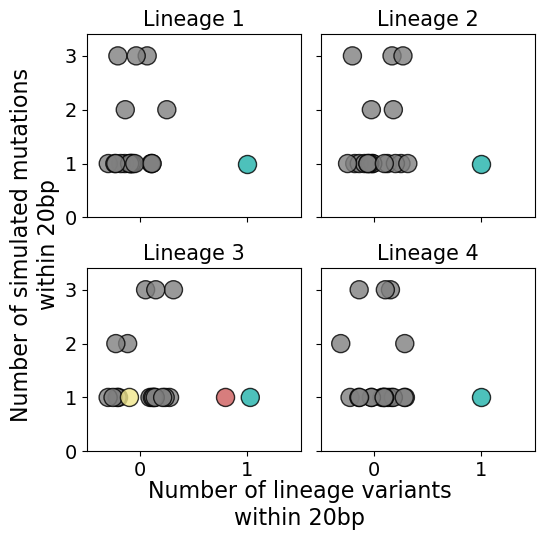

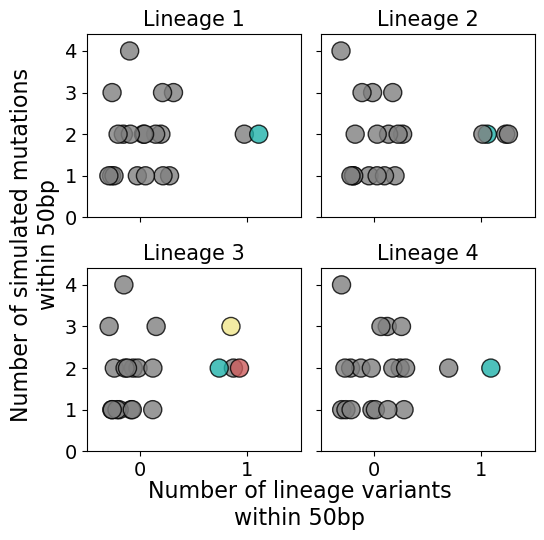

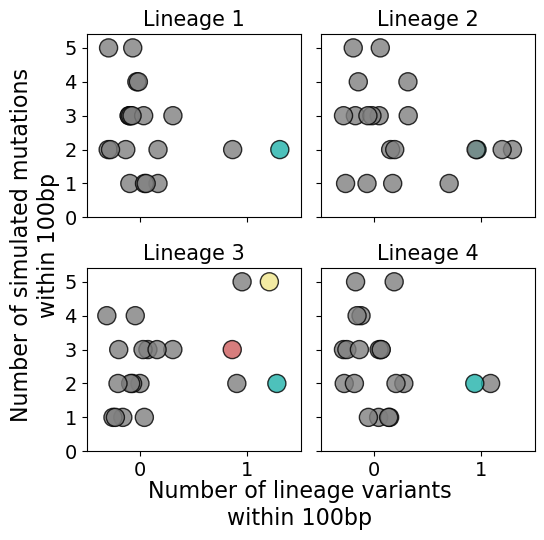

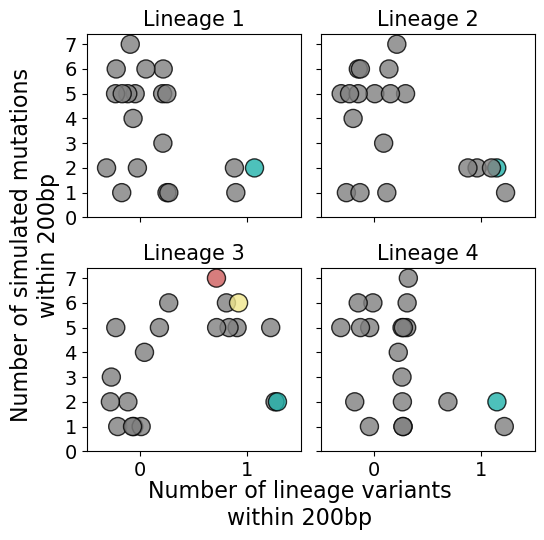

In [40]:
points_to_label = [7582, 2289072, 2289050]

pal_ = {"Unproblematic": "grey", "POS = 7582 (FB)": "#20B2AA", "POS = 2289072 (VD)": "#F0E68C", "POS = 2289050 (FB & VD)": "#CD5C5C"}

for ws in window_sizes:
    
    dfs = window_size_dfs[ws]
    
    fig, axs = plt.subplots(2, 2, figsize=(5, 5), sharex=True, sharey=True)
    
    for lineage in range(1, 5):
        
        plot_df = dfs[lineage]
        max_y = dfs[lineage]["num_mutation_{}bp".format(ws)].max()
        
        ax_i, ax_j = (lineage-1)//2, (lineage-1)%2
        ax = axs[ax_i][ax_j]
        
        ax.set_title("Lineage {}".format(lineage), fontsize=15)
        
        sns.stripplot(data=plot_df, x="num_baseline_{}bp".format(ws), y="num_mutation_{}bp".format(ws), 
                        size=13, ax=ax, jitter=0.32, legend=False, alpha=0.8,
                        hue="problematic", palette=pal_, edgecolor="black", linewidth=1)
        
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_ylim(bottom=0, top=max_y+0.4)
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        ax.tick_params(labelsize=14)
    
                                                 
    fig.text(0.5, -0.06, 'Number of lineage variants\nwithin {}bp'.format(ws), ha='center', fontsize=16)
    fig.text(-0.03, 0.5, 'Number of simulated mutations\nwithin {}bp'.format(ws), va='center', rotation='vertical', ha="center", fontsize=16) 

    plt.tight_layout()

    file_name = "./figures/problematic_lineage_SNPs/num_variants_within_{}bp_window_size.jpeg".format(ws)
    plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    file_name = "./figures/problematic_lineage_SNPs/num_variants_within_{}bp_window_size.pdf".format(ws)
    plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)
    
        
    plt.show()
    

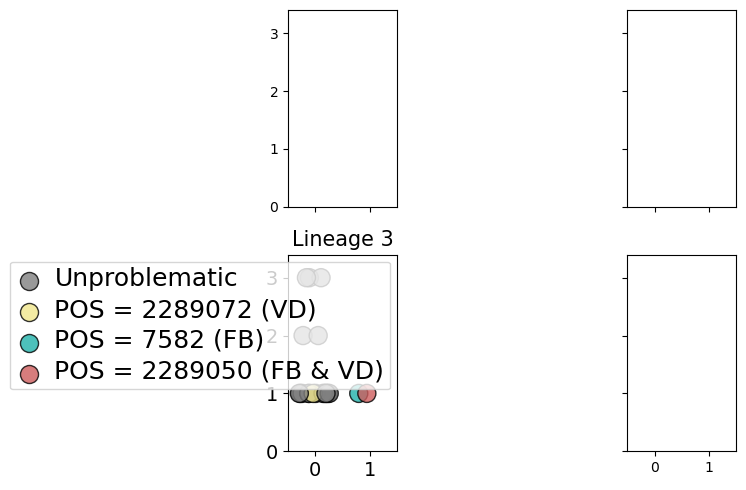

In [50]:
# legend

points_to_label = [7582, 2289072, 2289050]

pal_ = {"Unproblematic": "grey", "POS = 7582 (FB)": "#20B2AA", "POS = 2289072 (VD)": "#F0E68C", "POS = 2289050 (FB & VD)": "#CD5C5C"}

legend_bool = False

count = 1

ws = window_sizes[0]
dfs = window_size_dfs[ws]

fig, axs = plt.subplots(2, 2, figsize=(5, 5), sharex=True, sharey=True)

lineage = 3

plot_df = dfs[lineage]
max_y = dfs[lineage]["num_mutation_{}bp".format(ws)].max()

ax_i, ax_j = (lineage-1)//2, (lineage-1)%2
ax = axs[ax_i][ax_j]

ax.set_title("Lineage {}".format(lineage), fontsize=15)

sns.stripplot(data=plot_df, x="num_baseline_{}bp".format(ws), y="num_mutation_{}bp".format(ws), 
              size=13, ax=ax, jitter=0.32, legend=True, alpha=0.8,
              hue="problematic", palette=pal_, edgecolor="black", linewidth=1)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(bottom=0, top=max_y+0.4)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(labelsize=14)

plt.setp(ax.get_legend().get_texts(), fontsize='18')
ax.get_legend().set_title("")

plt.tight_layout()

file_name = "./figures/problematic_lineage_SNPs/window_size_legend.jpeg".format(ws)
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = "./figures/problematic_lineage_SNPs/window_size_legend.pdf".format(ws)
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

    
plt.show()
    